# 1. Install Packages and Library

In [ ]:
# Install package to get data from Kaggle
!pip install kaggle

In [ ]:
# import lib
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading data from Kaggle

In [ ]:
path = kagglehub.dataset_download("minahilfatima12328/lifestyle-and-sleep-patterns")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'lifestyle-and-sleep-patterns' dataset.
Path to dataset files: /kaggle/input/lifestyle-and-sleep-patterns
['Sleep_health_and_lifestyle_dataset.csv']


In [ ]:
# Load the file
df_raw = pd.read_csv('/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv')

print(df_raw.shape)
df_raw.head(5)

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# 3. Data Understanding

Link to dataset: https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns/data
| Column name | Explanation |
|-------------|-------------|
| **Person ID** | Unique identifier for each participant/record. |
| **Gender** | Participant’s gender. |
| **Age** | Participant’s age. |
| **Occupation** | Participant’s job/role category. |
| **Sleep Duration** | Average nightly sleep hours. |
| **Quality of Sleep** | Self-reported sleep quality score. |
| **Physical Activity Level** | Daily physical activity amount/level (often minutes or an index). |
| **Stress Level** | Self-reported stress level. |
| **BMI Category** | Weight status category derived from BMI. |
| **Blood Pressure** | Blood pressure as a single value in “Systolic/Diastolic” format. |
| **Heart Rate** | Resting heart rate. |
| **Daily Steps** | Number of steps taken per day. |
| **Sleep Disorder** | Presence/type of sleep disorder (e.g., Insomnia, Sleep Apnea, or None). |


## 3.1 Checking data quality

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df_raw.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 3.2 Data Exploring

In [ ]:
# Occupation
df_raw['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [ ]:
# BMI Category
df_raw['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
# Gender
df_raw['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# 4. Data Preprocessing

In [ ]:
df_processed = df_raw

print(df_processed.shape)
df_processed.head(5)

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 4.2 Fill in NULL values

In [ ]:
## Sleep Disorder
df_processed['Sleep Disorder'] = df_processed['Sleep Disorder'].fillna('No symptoms')

print(df_processed.shape)
df_processed.head(5)

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No symptoms
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No symptoms
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No symptoms
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 4.3 Group & Map data


### 4.3.1 Age Group

In [ ]:
## Age
### 18 - 35: Young Adult
### 36 - 45: Adult
### 46 - 59: Middle-Age
df_processed['Age_Category'] = "Undefined"
df_processed.loc[df_processed['Age'] <= 35, 'Age_Category'] = "Young Adult"
df_processed.loc[(df_processed['Age'] > 35) & (df_processed['Age'] <= 45), 'Age_Category'] = "Adult"
df_processed.loc[df_processed['Age'] > 45, 'Age_Category'] = "Middle-Age"

# Map categories to numeric labels
label_map = {
    "Unclassified": 0,
    "Young Adult": 1,
    "Adult": 2,
    "Middle-Age": 3
}

df_processed['Age_Category_Order'] = df_processed['Age_Category'].map(label_map)

print(df_processed.shape)
df_processed.groupby('Age_Category')['Person ID'].count()

(374, 15)


,Person ID
Age_Category,
Adult,170
Middle-Age,110
Young Adult,94


In [ ]:
df_processed.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_Category,Age_Category_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No symptoms,Young Adult,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No symptoms,Young Adult,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No symptoms,Young Adult,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young Adult,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young Adult,1


### 4.3.2 Blood Pressure

Base on American Heart Association (AHA), Blood Pressure (BP) can be group into 5 categories:

| Category                                 | Systolic (mmHg) | Diastolic (mmHg) |
| ---------------------------------------- | --------------- | ---------------- |
| **Normal**                               | < 120           | and < 80         |
| **Elevated**                             | 120–129         | and < 80         |
| **Hypertension Stage 1**                 | 130–139         | or 80–89         |
| **Hypertension Stage 2**                 | ≥ 140           | or ≥ 90          |
| **Hypertensive Crisis** (emergency care) | > 180           | and/or > 120     |


In [ ]:
df_processed['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
# Split BP into Systolic and Diastolic
df_processed[['Systolic', 'Diastolic']] = df_processed['Blood Pressure'].str.split('/', expand=True).astype(int)

print(df_processed.shape)
df_processed.head(1)

(374, 17)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_Category,Age_Category_Order,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No symptoms,Young Adult,1,126,83


In [ ]:
## Group Blood Pressure base on given condition
def bp_grouping(s, d):
    if s > 180 or d > 120:
        return "Hypertensive Crisis"
    elif s >= 140 or d >= 90:
        return "Hypertension Stage 2"
    elif s >= 130 or d >= 80:
        return "Hypertension Stage 1"
    elif 120 <= s <= 129 and d < 80:
        return "Elevated"
    elif s < 120 and d < 80:
        return "Normal"
    else:
        return "Unclassified"

df_processed['BP_Category'] = df_processed.apply(lambda row: bp_grouping(row['Systolic'], row['Diastolic']), axis=1)

# Map categories to numeric labels
label_map = {
    "Unclassified": 0,
    "Normal": 1,
    "Elevated": 2,
    "Hypertension Stage 1": 3,
    "Hypertension Stage 2": 4,
    "Hypertensive Crisis": 5
}

df_processed['BP_Category_Order'] = df_processed['BP_Category'].map(label_map)

print(df_processed.shape)
df_processed.head(1)

(374, 19)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_Category,Age_Category_Order,Systolic,Diastolic,BP_Category,BP_Category_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No symptoms,Young Adult,1,126,83,Hypertension Stage 1,3


In [ ]:
df_processed.groupby('BP_Category_Order')['Person ID'].count()

,Person ID
BP_Category_Order,
1,41
2,1
3,232
4,100


In [ ]:
df_processed.groupby('BP_Category')['Person ID'].count()

,Person ID
BP_Category,
Elevated,1
Hypertension Stage 1,232
Hypertension Stage 2,100
Normal,41


### 4.3.3 Daily Steps

Rules base on research of Tudor-Locke C: https://pmc.ncbi.nlm.nih.gov/articles/PMC3197470/#B11


In [ ]:
def daily_step_grouping(daily_steps):
  if daily_steps >= 10000:
    return "Active"
  elif daily_steps >= 7500:
    return "Somewhat Active"
  elif daily_steps >= 5000:
    return "Low Active"
  elif daily_steps < 5000:
    return "Sedentary"
  else:
    return "Unclassified"

df_processed['Daily_Steps_Category'] = df_processed.apply(lambda row: daily_step_grouping(row['Daily Steps']), axis=1)

# Map categories to numeric labels
label_map = {
    "Unclassified": 0,
    "Sedentary": 1,
    "Low Active": 2,
    "Somewhat Active": 3,
    "Active": 4
}

df_processed['Daily_Steps_Category_Order'] = df_processed['Daily_Steps_Category'].map(label_map)

print(df_processed.shape)
df_processed.head(1)

(374, 21)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Daily Steps,Sleep Disorder,Age_Category,Age_Category_Order,Systolic,Diastolic,BP_Category,BP_Category_Order,Daily_Steps_Category,Daily_Steps_Category_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,4200,No symptoms,Young Adult,1,126,83,Hypertension Stage 1,3,Sedentary,1


### 4.3.4 BMI Category

In [ ]:
df_processed['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
# Replace Normal Weight with Normal
df_processed['BMI Category'] = df_processed['BMI Category'].replace({'Normal Weight': 'Normal'})
df_processed['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [ ]:
# Map categories to numeric labels
label_map = {
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
}

df_processed['BMI_Category_Order'] = df_processed['BMI Category'].map(label_map)

print(df_processed.shape)
df_processed.head(1)

(374, 22)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Sleep Disorder,Age_Category,Age_Category_Order,Systolic,Diastolic,BP_Category,BP_Category_Order,Daily_Steps_Category,Daily_Steps_Category_Order,BMI_Category_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,No symptoms,Young Adult,1,126,83,Hypertension Stage 1,3,Sedentary,1,2


### 4.3.5 Sleep Duration

In [ ]:
def sleep_duration_grouping(sleep_duration):
  if sleep_duration >= 9:
    return "Long sleep"
  elif sleep_duration >= 7:
    return "Recommended sleep"
  elif sleep_duration < 7:
    return "Sleep deprivation"
  else:
    return "Unclassified"

df_processed['Sleep_Duration_Category'] = df_processed.apply(lambda row: sleep_duration_grouping(row['Sleep Duration']), axis=1)

# Map categories to numeric labels
label_map = {
    "Unclassified": 0,
    "Sleep deprivation": 1,
    "Recommended sleep": 2,
    "Long sleep": 3
}

df_processed['Sleep_Duration_Order'] = df_processed['Sleep_Duration_Category'].map(label_map)

print(df_processed.shape)
df_processed.head(1)

(374, 24)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Age_Category_Order,Systolic,Diastolic,BP_Category,BP_Category_Order,Daily_Steps_Category,Daily_Steps_Category_Order,BMI_Category_Order,Sleep_Duration_Category,Sleep_Duration_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,1,126,83,Hypertension Stage 1,3,Sedentary,1,2,Sleep deprivation,1


In [ ]:
df_processed['Sleep_Duration_Category'].unique()

array(['Sleep deprivation', 'Recommended sleep'], dtype=object)

4.3.6 Gender

In [ ]:
df_processed['Gender_Order'] = df_processed['Gender'].map({"Female": 0, "Male": 1})

print(df_processed.shape)
df_processed.head(1)

(374, 25)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Systolic,Diastolic,BP_Category,BP_Category_Order,Daily_Steps_Category,Daily_Steps_Category_Order,BMI_Category_Order,Sleep_Duration_Category,Sleep_Duration_Order,Gender_Order
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,126,83,Hypertension Stage 1,3,Sedentary,1,2,Sleep deprivation,1,1


# 5. Analytics (Just a bit)

In [ ]:
# Get numeric columns
numeric_cols = df_processed.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_cols)

['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Age_Category_Order', 'Systolic', 'Diastolic', 'BP_Category_Order', 'Daily_Steps_Category_Order', 'BMI_Category_Order', 'Sleep_Duration_Order', 'Gender_Order']


In [ ]:
correlation_matrix = df_processed[numeric_cols].corr()
print(correlation_matrix)

                            Person ID       Age  Sleep Duration  \
Person ID                    1.000000  0.990516        0.296305   
Age                          0.990516  1.000000        0.344709   
Sleep Duration               0.296305  0.344709        1.000000   
Quality of Sleep             0.431612  0.473734        0.883213   
Physical Activity Level      0.149882  0.178993        0.212360   
Stress Level                -0.394287 -0.422344       -0.811023   
Heart Rate                  -0.225467 -0.225606       -0.516455   
Daily Steps                  0.043844  0.057973       -0.039533   
Age_Category_Order           0.929749  0.936612        0.301612   
Systolic                     0.611551  0.605878       -0.180406   
Diastolic                    0.590670  0.593839       -0.166570   
BP_Category_Order            0.426805  0.419368       -0.121886   
Daily_Steps_Category_Order   0.007704  0.005146       -0.092301   
BMI_Category_Order           0.442905  0.427704       -0.34960

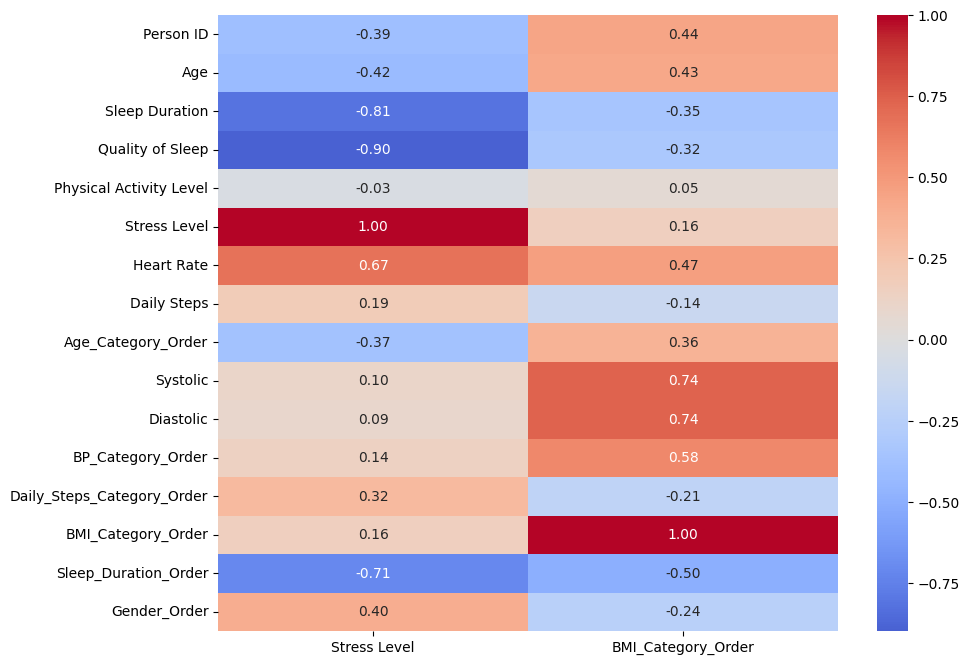

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[['Stress Level', 'BMI_Category_Order']], annot=True, cmap="coolwarm", fmt=".2f", center = 0)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_processed[['Age','Sleep Duration','Quality of Sleep','BMI_Category_Order', 'Gender_Order']].to_numpy()
Y = df_processed['Stress Level'].to_numpy()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

model = LinearRegression().fit(X_std, Y)
print("Intercept:", model.intercept_)
print("Coefs:", model.coef_)

def predict_stress(age, sleep, quality, bmi_order, gender):
    x = np.array([[age, sleep, quality, bmi_order, gender]])
    x_std = scaler.transform(x)
    pred = model.predict(x_std)[0]
    return max(0, min(10, round(pred, 2)))

Intercept: 5.385026737967915
Coefs: [ 0.63261068 -0.34651086 -1.63605347 -0.53884439  0.42944758]


In [ ]:
print(predict_stress(age=25, sleep=7, quality=8, bmi_order=1, gender = 1)) # Healthy, enough sleep, male
print(predict_stress(age=25, sleep=7, quality=8, bmi_order=1, gender = 0)) # Healthy, enough sleep, female

print(predict_stress(age=40, sleep=5, quality=5, bmi_order=2, gender = 1)) # Overweight, less sleep, male
print(predict_stress(age=40, sleep=5, quality=5, bmi_order=2, gender = 0)) # Overweight, less sleep, female

print(predict_stress(age=55, sleep=4, quality=3, bmi_order=3, gender = 1)) # Obese, what the hell is sleeping?
print(predict_stress(age=55, sleep=4, quality=3, bmi_order=3, gender = 0)) # Obese, what the hell is sleeping?

4.11
3.25
9.2
8.35
10
10


In [ ]:
print(predict_stress(age=27, sleep=6, quality=9, bmi_order=3, gender = 1)) # Overweight, less sleep, male

1.36


# 6. Data Exporting

## 6.1 Main data

In [ ]:
df_processed.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Age_Category', 'Age_Category_Order', 'Systolic',
       'Diastolic', 'BP_Category', 'BP_Category_Order', 'Daily_Steps_Category',
       'Daily_Steps_Category_Order', 'BMI_Category_Order',
       'Sleep_Duration_Category', 'Sleep_Duration_Order'],
      dtype='object')

In [131]:
df_main = df_processed[['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
                        'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                        'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'BMI_Category_Order']]

# df_processed.to_excel('/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx', sheet_name = 'fact_lifestyle')
with pd.ExcelWriter("/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_main.to_excel(writer, sheet_name="fact_lifestyle", index=False)

In [132]:
# Gender
df_raw['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## 6.2 Age Group


In [133]:
df_age_group = df_processed[['Age', 'Age_Category', 'Age_Category_Order']].drop_duplicates()

with pd.ExcelWriter("/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_age_group.to_excel(writer, sheet_name="dim_age", index=False)

## 6.3 Daily Steps


In [134]:
df_daily_steps = df_processed[['Daily Steps', 'Daily_Steps_Category', 'Daily_Steps_Category_Order']].drop_duplicates()

with pd.ExcelWriter("/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_daily_steps.to_excel(writer, sheet_name="dim_daily_steps", index=False)

## 6.4 Hear_Rate


In [140]:
df_blood_pressure = df_processed[['Blood Pressure','Systolic', 'Diastolic', 'BP_Category', 'BP_Category_Order']].drop_duplicates()

with pd.ExcelWriter("/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_blood_pressure.to_excel(writer, sheet_name="dim_blood_pressure", index=False)

## 6.5 Model_parameter

In [136]:
# Create table to store model parameter
columns = ["interval", "age", "sleep", "quality", "bmi_order", "gender"]

intercept = model.intercept_
coefs = model.coef_

df_model_param = pd.DataFrame([[intercept, *coefs]], columns=columns)

print(df_model_param.shape)
df_model_param.head()

(1, 6)


,interval,age,sleep,quality,bmi_order,gender
0,5.385027,0.632611,-0.346511,-1.636053,-0.538844,0.429448


In [137]:
with pd.ExcelWriter("/content/drive/MyDrive/Freelance/Cohesion/lifestyle_analyzing.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_model_param.to_excel(writer, sheet_name="model_param", index=False)